#Predict geographical origin of music

##Get the data
The dataset can be obtained at http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music   
Unzip it to PATH_TO_DS_HK_5/ds/data/final_project  
We will be using the file called "default_features_1059_tracks.txt"  

## About the data
The dataset contains attributes of 1059 tracks of ethnic or traditional music.

The 1st 67 attributes (columns) are "audio features" extracted from each song using MARSYAS software.
The remaining 2 columns correspond to the latitude and longitude of the artist(s)' main country/ area of residence.

More info can be found at: http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music

##A few word about these audio features

TO COMPLETE...

 -  quick word about MARSYAS
 - brief description of some audio features


## 1st look at the data set

In [2]:
%matplotlib inline
#TODO: clean imports
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn import metrics
from sklearn import preprocessing

pd.set_option('display.precision',4)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
#let's load the data set
df = pd.read_csv('../data/final_project/default_features_1059_tracks.txt', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 70 columns):
0     1059 non-null float64
1     1059 non-null float64
2     1059 non-null float64
3     1059 non-null float64
4     1059 non-null float64
5     1059 non-null float64
6     1059 non-null float64
7     1059 non-null float64
8     1059 non-null float64
9     1059 non-null float64
10    1059 non-null float64
11    1059 non-null float64
12    1059 non-null float64
13    1059 non-null float64
14    1059 non-null float64
15    1059 non-null float64
16    1059 non-null float64
17    1059 non-null float64
18    1059 non-null float64
19    1059 non-null float64
20    1059 non-null float64
21    1059 non-null float64
22    1059 non-null float64
23    1059 non-null float64
24    1059 non-null float64
25    1059 non-null float64
26    1059 non-null float64
27    1059 non-null float64
28    1059 non-null float64
29    1059 non-null float64
30    1059 non-null float64
31    1059 non-null float

In [3]:
#rename columns
labels = range(0,68)
labels.extend(['lat','lon'])

df.columns= labels 

df.describe()

0       1       2       3       4       5       6       7       8  \
count 1059.00 1059.00 1059.00 1059.00 1059.00 1059.00 1059.00 1059.00 1059.00   
mean    -0.02   -0.02   -0.03   -0.04    0.03    0.00   -0.02    0.01   -0.03   
std      0.99    0.99    0.97    0.98    1.00    1.00    0.99    1.01    1.01   
min     -1.53   -1.48   -1.13   -3.22   -3.39   -4.37   -4.29   -5.29   -5.28   
25%     -0.61   -0.62   -0.60   -0.64   -0.60   -0.63   -0.61   -0.56   -0.51   
50%     -0.18   -0.21   -0.30   -0.13    0.16    0.01    0.04    0.04    0.07   
75%      0.31    0.31    0.16    0.46    0.74    0.66    0.64    0.57    0.58   
max      9.44   10.72    6.16    5.93    2.28    2.90    2.72    3.13    3.95   

            9   ...        60      61      62      63      64      65      66  \
count 1059.00   ...   1059.00 1059.00 1059.00 1059.00 1059.00 1059.00 1059.00   
mean    -0.02   ...      0.03    0.02    0.03    0.02    0.03    0.02    0.02   
std      1.02   ...      1.01    1.01    1.01    1.00    1.00    1.00    1.01   
min     -6.86   ...     -1.60   -1.58   -1.61   -1.51   -1.40   -1.25   -1.22   
25%     -0.46   ...     -0.67   -0.68   -0.69   -0.66   -0.69   -0.65   -0.64   
50%      0.09   ...     -0.21   -0.20   -0.18   -0.19   -0.24   -0.25   -0.32   
75%      0.57   ...      0.47    0.49    0.49    0.48    0.49    0.33    0.42   
max      3.49   ...      7.40    5.34    8.33    5.85    5.44    6.44    5.39   

           67     lat     lon  
count 1059.00 1059.00 1059.00  
mean     0.02   26.65   38.41  
std      1.01   18.46   50.42  
min     -1.33  -35.30  -88.76  
25%     -0.66   14.66    3.21  
50%     -0.30   33.66   32.83  
75%      0.35   39.91   74.60  
max      5.98   54.68  149.12  

[8 rows x 70 columns]

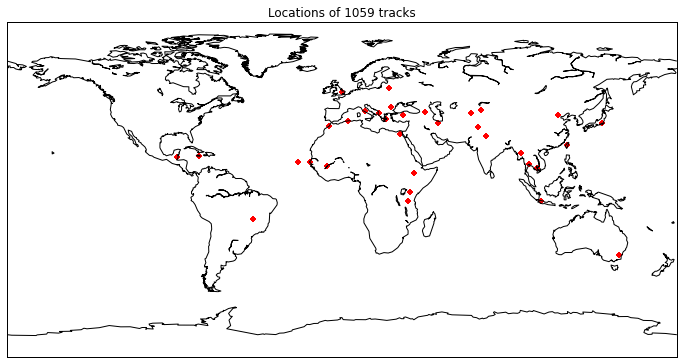

In [4]:
#let's try to plot our latitudes and longitudes on a map to visualize where the tracks are coming from
import numpy as np
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from datetime import datetime



lons = [ i for i in df.iloc[:,-1]]
lats = [ j for j in df.iloc[:,-2]]
plt.figure(figsize=(12,6))
map = Basemap(lat_0=0, lon_0=0)



# plot coastlines.
map.drawcoastlines()
map.drawmapboundary()


x, y = map(lons, lats)

map.scatter(x,y,10,marker='D',color='r')


plt.title('Locations of 1059 tracks',fontsize=12)
plt.show()

The country of origin was determined by the artist's or artists' main country/area of residence. Any track that had ambiguous origin was not included. The authors of the dataset have taken the position of each country's capital city (or the province of the area) by latitude and longitude as the absolute point of origin. 

In [5]:
#trying to find how many unique (longitude;latitude) they are, i.e. how many different regions of the world 
#are represented in this dataset


Ys = df.iloc[:,68:].copy(deep=True)
print Ys.head()
# 33 different regions
Ys = Ys.drop_duplicates() 
Ys.index = range(Ys['lat'].count())
Ys.count()

     lat    lon
0 -15.75 -47.95
1  14.91 -23.51
2  12.65  -8.00
3   9.03  38.74
4  34.03  -6.85


lat    33
lon    33
dtype: int64

In [5]:
#let's install geopy to map those coordinates to locations
!pip install geopy

The directory '/home/vagrant/.cache/pip/log' or its parent directory is not owned by the current user and the debug log has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/vagrant/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/vagrant/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL

In [6]:
#let's map those coordinates to countries or regions

from geopy.geocoders import Nominatim

def find_addr_from_coord(str_coords):

    geolocator = Nominatim()
    location= geolocator.reverse(str_coords,timeout=10,language="en")
    return location


Ys['address'] =Ys.apply(lambda row: find_addr_from_coord(str(row['lat'])+","+str(row['lon'])) ,axis=1)



In [7]:
print Ys

      lat    lon                                            address
0  -15.75 -47.95  (Setor Noroeste, Brasília, Federal District, C...
1   14.91 -23.51  (Avenida Combatentes da Liberdade da Patria, B...
2   12.65  -8.00  (Grand Hotel, Place de la liberté;Avenue de la...
3    9.03  38.74  (Africa Market, Dej Wolde Michael Street, Merk...
4   34.03  -6.85  (شارع المختار جزوليت, حي المحيط, Hassan, Rabat...
5   14.66 -17.41  (Plateau, Dakar, Dakar Region, Senegal, (14.66...
6   52.50  -0.12  (Oilmills Road, Whittlesey CP, Fenland, Cambri...
7   41.26  69.21  (Абая улица, Домбрабад, Chilanzar District, Ta...
8   41.90  12.48  (Cesari's Terrace, 89, Via di Pietra, Pigna, M...
9   28.61  77.20  (Tyagaraj Marg, Safdarjung, New Delhi, Delhi, ...
10  33.66  73.16  (Chatha Bakhtawar Road, Chak Shehzad, Islamaba...
11  54.68  25.31  (17, Zarasų g., Senamiesčio seniūnija, Vilnius...
12  44.41  26.10  (12, Strada General Gheorghe Lupu, București, ...
13  36.70   3.21  (26, Dar El Beida, Dar El Beïd

In [8]:
#parse and format the locations, so that they are more legible
def parse_addr(row):
    f_addr=""
    if 'city' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['city'].encode('utf-8') 
        
    elif 'town' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['town'].encode('utf-8') 
       
    elif 'village' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['village'].encode('utf-8') 
        
    elif 'neighbourhood' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['neighbourhood'].encode('utf-8') 
    
    elif 'suburb' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['suburb'].encode('utf-8') 
    
    return f_addr +" ("+ row['address'].raw['address']['country'].encode('utf-8') + ")"

Ys['formatted_address'] =Ys.apply(lambda row:parse_addr(row) ,axis=1)


In [58]:
print Ys['formatted_address']
#turn each unique address/location into an int
Ys['num_addr'] = range(0,33)


0                        Brasília (Brazil)
1                       Praia (Cape Verde)
2                            Bamako (Mali)
3                   Addis Abeba (Ethiopia)
4                          Rabat (Morocco)
5                          Dakar (Senegal)
6                 Fenland (United Kingdom)
7                    Tashkent (Uzbekistan)
8                             Rome (Italy)
9                        New Delhi (India)
10                 Chak Shehzad (Pakistan)
11                     Vilnius (Lithuania)
12                     Bucharest (Romania)
13                  Dar El Beida (Algeria)
14                         Ankara (Turkey)
15                     Naypyidaw (Myanmar)
16                     Siri Rat (Thailand)
17    Beijing (People's Republic of China)
18          Sinyi Town (Republic of China)
19                       RW 08 (Indonesia)
20                      Kingston (Jamaica)
21                           Tehran (Iran)
22                            Giza (Egypt)
23         

In [59]:

# map those regions/locations to each of the 1059 rows of the original dataset
result = pd.merge(df, Ys,how='left', on=['lat', 'lon'])



In [61]:
#backup dataset to CSV file
result.to_csv("../data/final_project/final_project_with_formatted_addr.csv", encoding='utf-8')

print result.head(10)

      0     1     2     3     4     5     6     7     8     9    ...       63  \
0  7.16  7.84  2.91  0.98 -1.50 -2.09  0.58 -1.21  1.85 -0.43    ...    -0.17   
1  0.23 -0.09 -0.60  0.50  0.87  0.29 -0.08 -0.89  0.43 -0.09    ...    -0.16   
2 -0.69 -0.52 -0.79  1.21 -0.91  0.88  0.41 -0.69 -0.90 -1.70    ...     2.72   
3 -0.74 -0.68  2.06  0.72 -0.01  0.81  1.50  0.11  0.69  0.05    ...    -1.02   
4  0.57  0.27 -0.28  0.08  1.05 -0.87 -0.27 -0.40 -0.87  1.15    ...    -0.19   
5  0.06  0.03 -0.70  0.19 -0.27  1.42  0.47  0.21 -0.50  1.24    ...     0.06   
6 -0.28 -0.31 -0.76  0.84 -0.20  1.15 -0.47  1.49 -0.11  1.37    ...     1.10   
7 -0.50 -0.63 -0.14 -0.07  0.26  0.34 -0.20  1.64  0.93  0.42    ...    -0.14   
8  0.36  0.22 -0.42  0.01  0.16 -0.05 -0.30  0.53 -0.56 -0.34    ...    -1.04   
9 -0.91 -0.58 -0.72 -0.60  0.25  1.13 -0.39  0.13  1.02  1.19    ...    -0.94   

     64    65    66    67    lat    lon  \
0 -1.09 -0.67 -0.91 -0.84 -15.75 -47.95   
1  0.38  1.09 -0.12  1

##EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10904edf10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f108c1a8490>]], dtype=object)

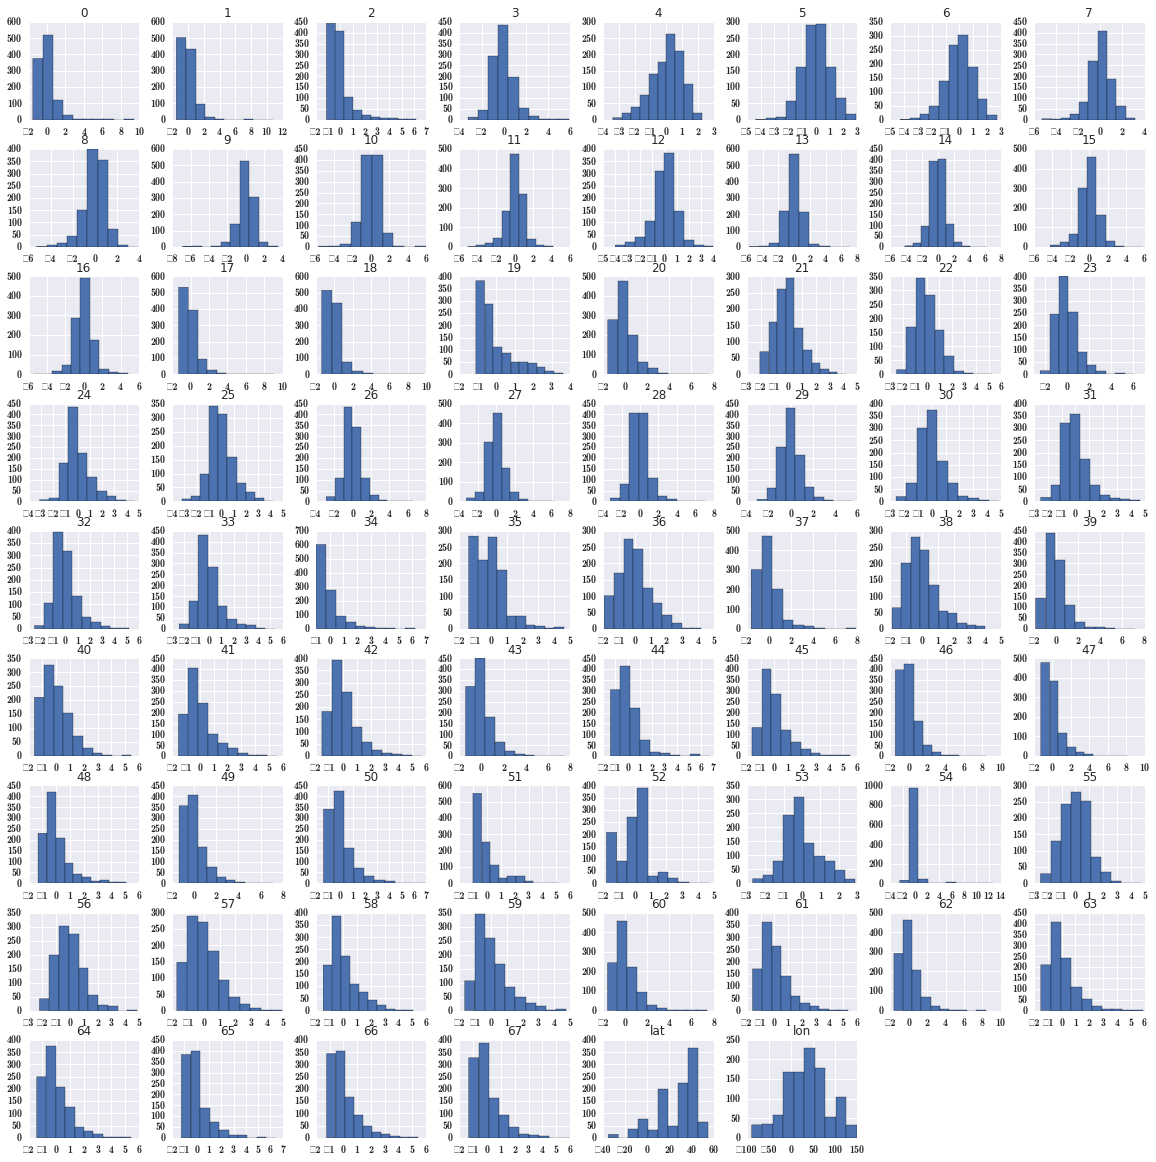

In [14]:
import seaborn as sns


result.hist( figsize=(20, 20))

## PCA

Dataset has alreay been normalized

In [20]:
from sklearn.decomposition import PCA


sns.set(style="white", context="talk")
pca = PCA()
Xs = result.iloc[:,:68]
pca.fit(Xs)



PCA(copy=True, n_components=None, whiten=False)

In [24]:
Xs

0     1     2     3     4     5     6     7     8     9   ...     58  \
0     7.16  7.84  2.91  0.98 -1.50 -2.09  0.58 -1.21  1.85 -0.43  ...  -0.94   
1     0.23 -0.09 -0.60  0.50  0.87  0.29 -0.08 -0.89  0.43 -0.09  ...  -0.08   
2    -0.69 -0.52 -0.79  1.21 -0.91  0.88  0.41 -0.69 -0.90 -1.70  ...  -0.80   
3    -0.74 -0.68  2.06  0.72 -0.01  0.81  1.50  0.11  0.69  0.05  ...  -0.81   
4     0.57  0.27 -0.28  0.08  1.05 -0.87 -0.27 -0.40 -0.87  1.15  ...  -0.18   
5     0.06  0.03 -0.70  0.19 -0.27  1.42  0.47  0.21 -0.50  1.24  ...   1.40   
6    -0.28 -0.31 -0.76  0.84 -0.20  1.15 -0.47  1.49 -0.11  1.37  ...   0.04   
7    -0.50 -0.63 -0.14 -0.07  0.26  0.34 -0.20  1.64  0.93  0.42  ...   0.40   
8     0.36  0.22 -0.42  0.01  0.16 -0.05 -0.30  0.53 -0.56 -0.34  ...  -0.98   
9    -0.91 -0.58 -0.72 -0.60  0.25  1.13 -0.39  0.13  1.02  1.19  ...  -0.05   
10    2.83  2.25  1.17 -0.25 -1.35 -2.37  2.48 -0.39 -0.13 -0.36  ...  -0.05   
11    0.17 -0.09 -0.17  0.53  0.94 -0.67  0.16  0.48  0.22  0.38  ...  -1.08   
12    1.82  2.31  0.32 -1.51 -1.40 -0.44 -0.20 -0.61 -1.02  1.35  ...  -0.89   
13    0.41  0.31 -0.35 -0.04  0.67 -0.30 -0.63  0.50  0.27 -0.88  ...  -1.16   
14   -0.34 -0.34 -0.81  0.48  0.40 -0.84 -0.92 -2.69 -5.28 -5.59  ...   0.90   
15   -0.29  0.05 -0.18 -0.25  1.03 -0.24 -0.11 -0.76 -0.17  0.12  ...  -1.10   
16   -0.65  0.10 -0.36  0.13 -0.98  0.64  0.07  0.14  0.23 -0.28  ...  -0.09   
17    1.41  1.22  0.51 -2.15  1.03 -1.60 -1.41  0.03  0.22 -0.17  ...  -1.20   
18   -0.30  0.01 -0.29 -0.32  0.57  0.20  0.31 -0.97 -0.77  0.28  ...   0.79   
19   -0.26 -0.02 -0.47 -1.16  0.36 -0.31 -0.41  0.48 -0.31 -0.23  ...  -0.36   
20    0.42 -0.02  0.04 -0.18  0.46 -0.91  0.05 -0.21  0.20  0.86  ...  -0.59   
21   -0.16  0.06  0.26 -0.93  0.14 -0.65 -0.51 -0.60  0.11  0.31  ...  -0.47   
22   -0.48 -0.12 -0.58 -0.70  0.59  0.19 -0.21 -0.62 -0.21  0.54  ...   0.69   
23   -0.15  0.15 -0.37  0.68  1.14 -0.07 -0.65 -0.44 -0.17 -0.27  ...  -0.40   
24   -0.19  0.11 -0.36 -0.36  1.56 -0.32 -0.23 -0.97 -0.01  0.31  ...  -0.86   
25   -0.36  0.09 -0.51  0.14  0.09  0.59  0.23  0.40  1.10 -0.97  ...  -0.74   
26    0.73  0.74  0.57 -0.02  0.58 -1.72  1.66 -0.07  0.78  0.57  ...  -0.68   
27    0.56  0.44  2.02  1.17 -0.56 -1.09  0.47  0.67  1.13  0.61  ...  -0.01   
28   -0.98  0.44 -0.30  4.54 -1.18  2.85  0.62 -1.00  0.25 -0.73  ...  -0.39   
29    4.70  4.30  3.35  2.35  0.13 -1.46  0.30 -0.58  0.57 -0.96  ...  -0.02   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
1029 -0.46 -0.56 -0.84 -0.46 -0.71  1.43 -1.40 -1.46 -0.40 -0.36  ...   0.04   
1030 -0.06 -0.40 -0.75 -0.48  0.06  0.99  0.63 -0.44  0.38 -0.34  ...  -0.78   
1031  0.40 -0.50 -0.55 -0.86  1.09 -0.26  1.22 -1.20  0.15 -0.18  ...   0.11   
1032 -0.44 -0.46 -0.34 -0.45  0.25 -0.00 -0.65  0.33 -0.13 -0.70  ...  -0.43   
1033 -1.24 -1.09 -0.70  0.79 -1.40  1.58  0.91  1.24  1.08  1.00  ...  -0.48   
1034 -0.04 -0.26 -0.37  0.61  1.18 -0.86  0.24  0.82  0.26  0.47  ...  -0.36   
1035 -1.10 -0.98  0.09  0.26 -0.52  0.80  0.53  0.99  0.07  1.31  ...  -0.54   
1036  0.91  0.18  0.68  0.18 -0.62 -0.96  0.36  1.17  0.39  0.67  ...  -0.66   
1037  0.60  0.36  0.36 -0.31  1.00 -1.24  0.31 -0.27  0.21  0.47  ...  -0.33   
1038  1.88  1.36  0.67  1.66  0.57 -0.69  0.24 -0.44  0.61 -0.27  ...  -1.03   
1039  1.70  0.93  0.10 -0.69 -1.54  0.50  1.77 -0.23  1.58  0.85  ...   0.75   
1040  3.78  3.34  1.23 -0.17 -0.98 -2.21  1.34 -1.22 -0.73 -2.23  ...  -0.17   
1041 -0.44 -0.99 -0.28 -0.33 -1.07  0.27  1.24  0.09  0.46 -0.15  ...  -1.07   
1042 -0.63 -0.36 -0.60 -0.65  0.11  0.15 -0.58  0.52  1.12  0.62  ...  -0.19   
1043 -0.78 -0.09 -0.17 -1.18 -0.51  1.05 -0.28  0.13 -0.20 -0.47  ...  -0.38   
1044 -0.37 -0.05 -0.53 -0.98 -0.02  0.37 -0.67 -0.30  0.06 -0.03  ...   0.06   
1045 -1.14 -0.97  6.16  0.03 -1.72 -0.82  1.13  1.80  1.09  0.62  ...  -0.52   
1046  0.55  0.83  0.05 -0.16 -0.25 -0.44 -1.12  2.44 -1.54  0.63  ...   2.26   
1047 -0.

['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40', 'pc41', 'pc42', 'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50', 'pc51', 'pc52', 'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60', 'pc61', 'pc62', 'pc63', 'pc64', 'pc65', 'pc66', 'pc67']


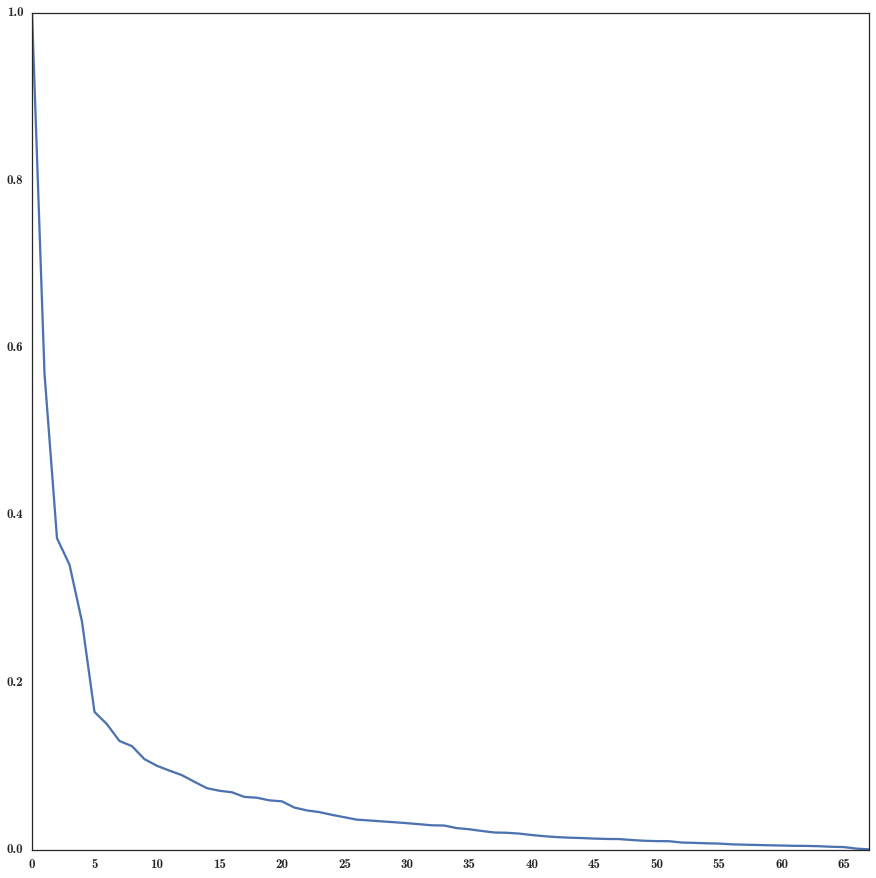

In [36]:
labels=['pc' + str(pc) for pc in range (0,68)]
var = pca.explained_variance_ratio_ / max(pca.explained_variance_ratio_)
plt.figure(figsize=(15,15))
plt.xticks(np.arange(0, 70, 5))
plt.plot(var)

print labels

This plot returns a plot of the variances associated with the PCs. We can see that the 6 PCs (including pc0) are enough to explain most of the variance in the data set

In [38]:
df_pca = pd.DataFrame(pca.transform(Xs),columns=labels)
df_pca.head()

pc0   pc1   pc2  pc3   pc4   pc5   pc6  pc7   pc8   pc9  ...   pc58  pc59  \
0  1.22  7.87 -3.75 8.33 -6.60  0.96 -3.56 1.73  1.05  0.67  ...   0.41 -1.46   
1 -0.16  0.71  0.56 2.75  0.48 -0.75  0.59 1.95  0.85  0.23  ...   0.16 -0.33   
2 -4.20 -1.30  2.20 0.59  2.90  1.05  0.64 1.21  0.55 -1.68  ...  -0.79 -0.08   
3  0.98  3.83 -2.32 0.26  1.66  1.81  0.39 1.48 -0.00 -1.89  ...   0.13 -0.24   
4 -0.36 -1.62  0.61 2.78 -0.40 -0.75 -0.08 1.37 -0.80  0.09  ...  -0.11 -0.25   

   pc60  pc61  pc62  pc63  pc64  pc65  pc66  pc67  
0  0.28  0.54  0.27 -0.07 -0.64 -0.07 -0.08  0.07  
1  0.11 -0.08 -0.57  0.28  0.47  0.34  0.23  0.09  
2  0.46  0.21 -0.38 -0.02  0.29  0.20  0.03  0.02  
3  0.13 -0.33 -0.35 -0.07  0.37 -0.36 -0.11 -0.02  
4  0.12 -0.12 -0.40  0.27 -0.08  0.23 -0.02 -0.16  

[5 rows x 68 columns]

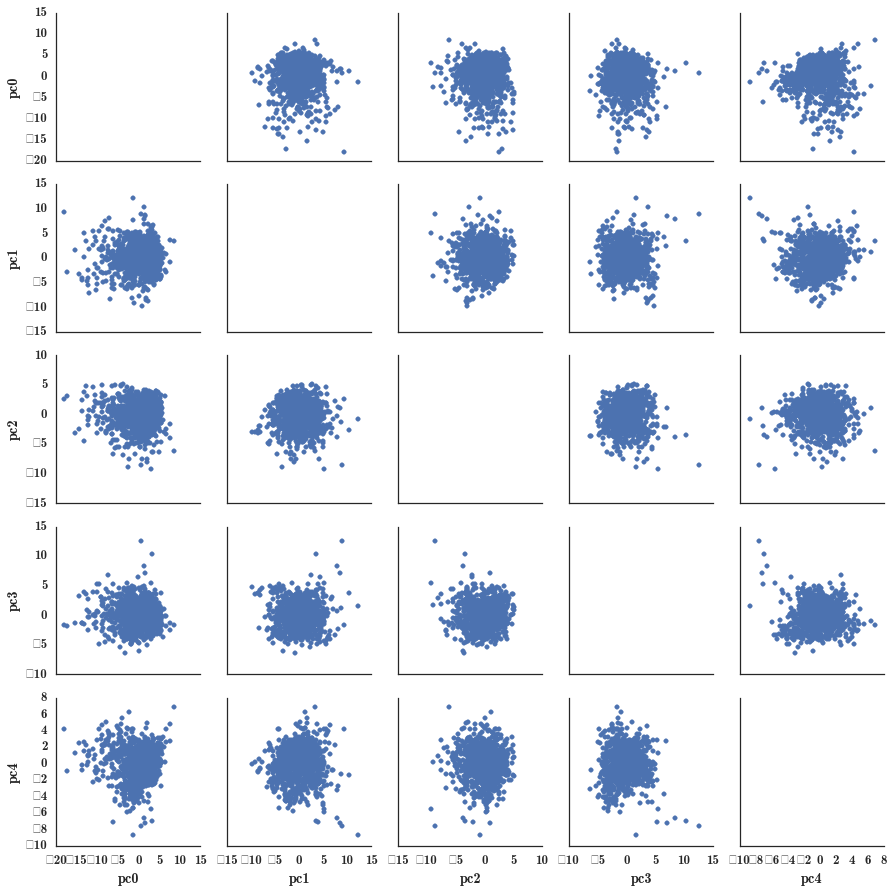

In [46]:
g = sns.PairGrid(df_pca.iloc[:,:5],size=2.5)
g.map_offdiag(plt.scatter)

In [50]:
print "Meaning of the 5 components:"
for component in pca.components_[:5]:
    print " + ".join("%.3f x %s" % (value,"feature_"+str(name))
                    for value,name in zip(component,Xs.columns))
    print "\n"

Meaning of the 5 components:
-0.043 x feature_0 + -0.063 x feature_1 + 0.026 x feature_2 + 0.030 x feature_3 + 0.017 x feature_4 + 0.065 x feature_5 + 0.082 x feature_6 + 0.069 x feature_7 + 0.098 x feature_8 + 0.093 x feature_9 + 0.084 x feature_10 + 0.058 x feature_11 + 0.031 x feature_12 + 0.025 x feature_13 + -0.006 x feature_14 + 0.010 x feature_15 + -0.035 x feature_16 + -0.002 x feature_17 + -0.004 x feature_18 + 0.061 x feature_19 + 0.012 x feature_20 + -0.026 x feature_21 + -0.009 x feature_22 + -0.049 x feature_23 + -0.077 x feature_24 + -0.117 x feature_25 + -0.129 x feature_26 + -0.145 x feature_27 + -0.154 x feature_28 + -0.145 x feature_29 + -0.167 x feature_30 + -0.179 x feature_31 + -0.183 x feature_32 + -0.155 x feature_33 + -0.021 x feature_34 + -0.008 x feature_35 + 0.007 x feature_36 + -0.025 x feature_37 + -0.059 x feature_38 + -0.067 x feature_39 + -0.101 x feature_40 + -0.120 x feature_41 + -0.155 x feature_42 + -0.182 x feature_43 + -0.186 x feature_44 + -0.193 

###Circle of correlation

     pc0   pc1   pc2   pc3   pc4   pc5
0   0.16 -0.13  0.16 -0.66  0.58 -0.01
1   0.24 -0.16  0.32 -0.68  0.43  0.08
2  -0.10 -0.48  0.32 -0.25  0.05 -0.28
3  -0.11 -0.55 -0.30  0.25 -0.23 -0.12
4  -0.06  0.16 -0.34 -0.30  0.23  0.25
5  -0.24  0.01  0.04  0.64 -0.39  0.12
6  -0.31 -0.36  0.02  0.18 -0.20 -0.09
7  -0.25 -0.14 -0.05  0.25 -0.14  0.21
8  -0.36 -0.41  0.02 -0.08 -0.31  0.06
9  -0.34 -0.24  0.06  0.07 -0.08  0.20
10 -0.30 -0.26  0.11  0.12 -0.13 -0.05
11 -0.21 -0.18 -0.01 -0.16 -0.20 -0.24
12 -0.11 -0.30  0.11  0.18  0.03 -0.34
13 -0.09 -0.10  0.04  0.01 -0.02 -0.49
14  0.02 -0.12  0.18  0.11  0.20 -0.49
15 -0.04 -0.12  0.10 -0.02 -0.03 -0.47
16  0.13 -0.01  0.10  0.08  0.25 -0.31
17  0.01 -0.60  0.08 -0.44  0.47 -0.02
18  0.01 -0.65  0.14 -0.47  0.38  0.01
19 -0.23 -0.61  0.09 -0.01 -0.11 -0.31
20 -0.05 -0.50 -0.09  0.16 -0.40  0.01
21  0.10 -0.77  0.04  0.06 -0.26  0.06
22  0.04 -0.74 -0.11  0.23 -0.16  0.06
23  0.18 -0.71 -0.14  0.23  0.16  0.10
24  0.29 -0.58 -0.23  0.3

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


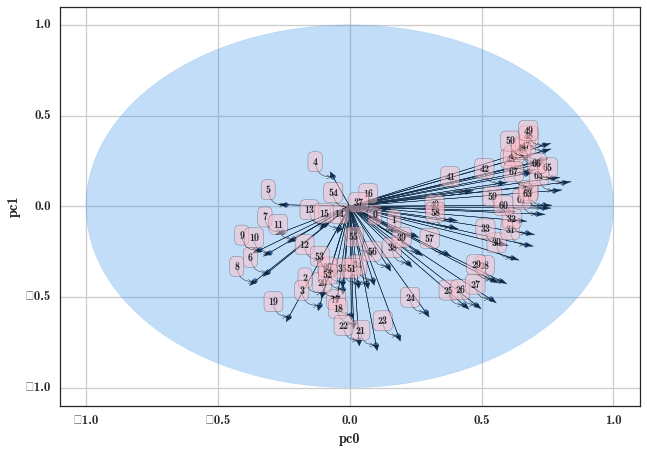

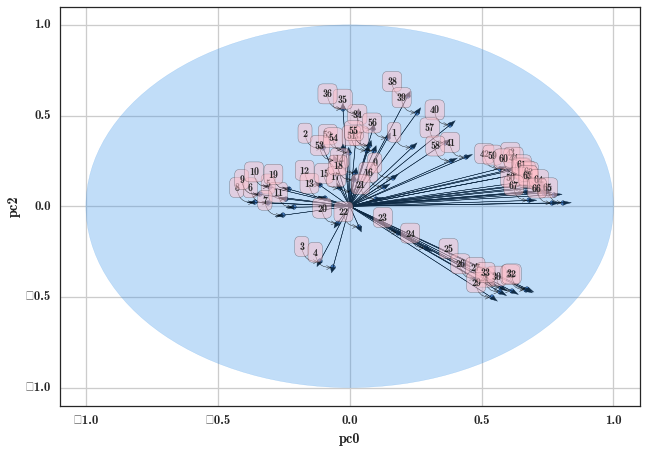

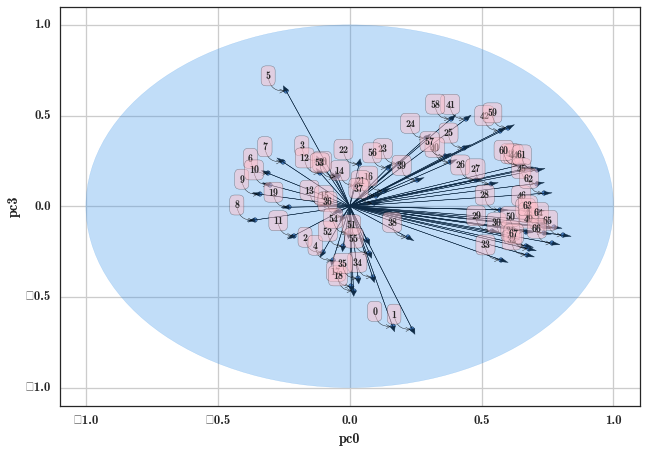

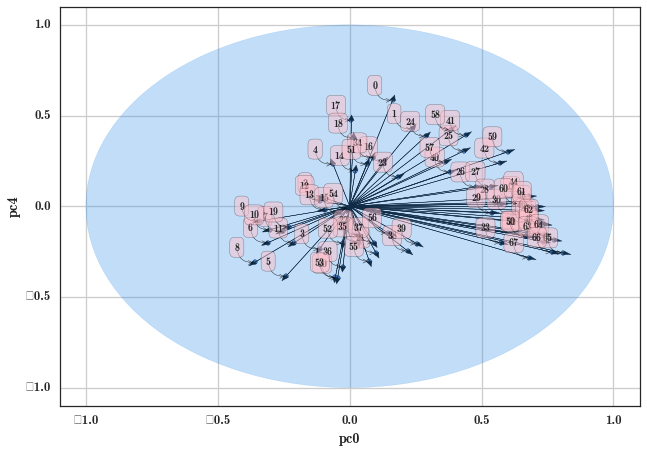

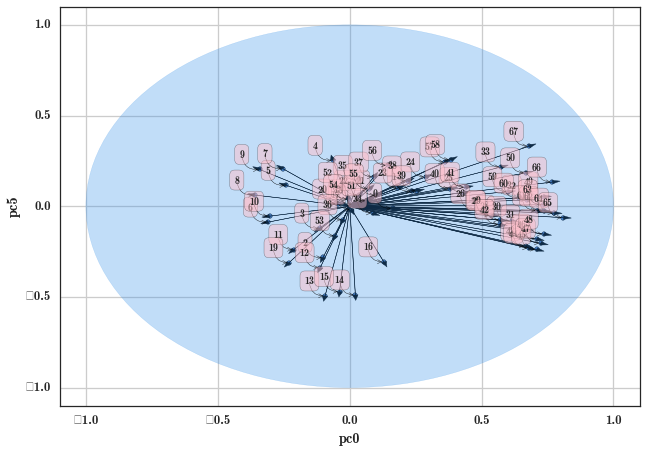

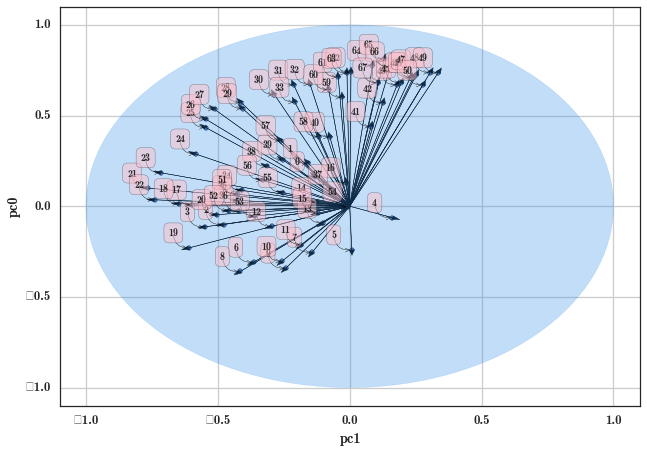

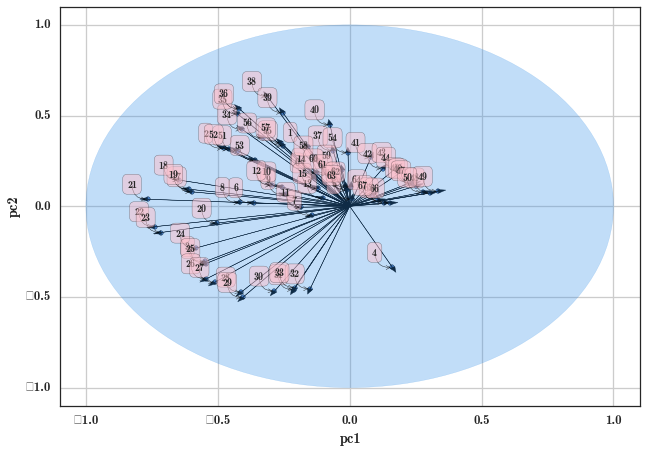

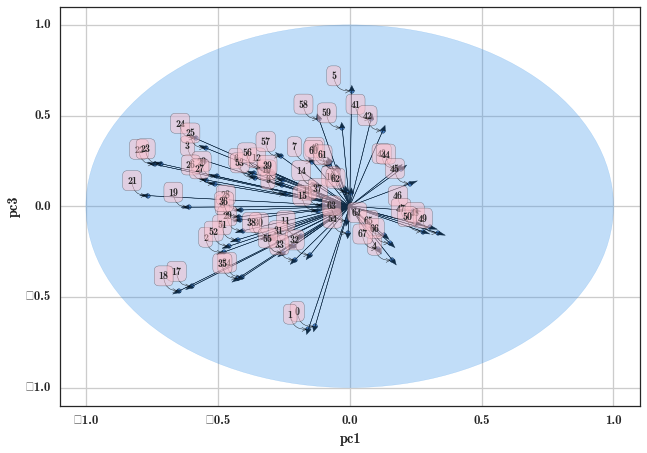

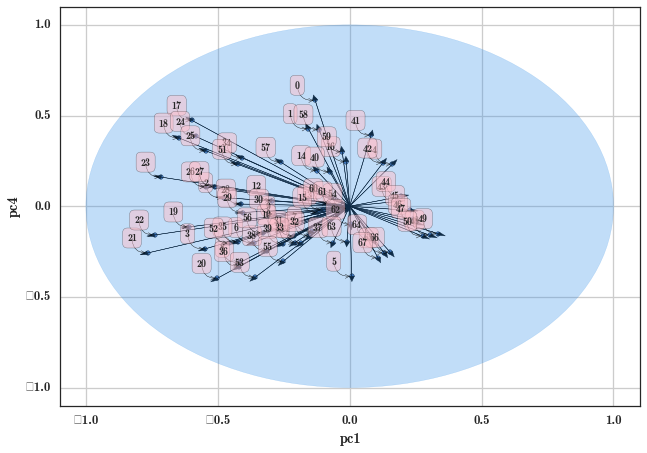

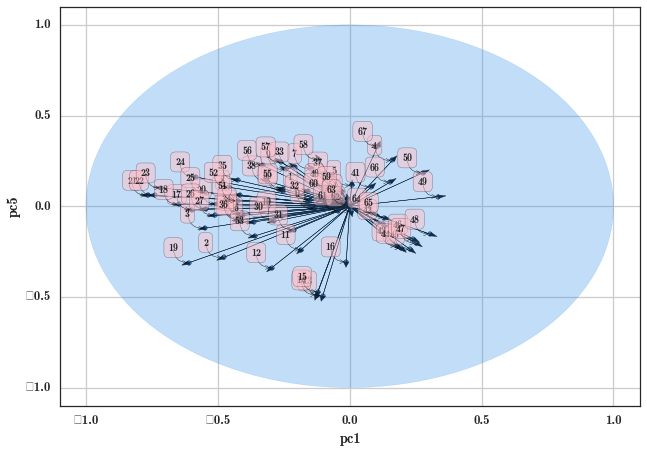

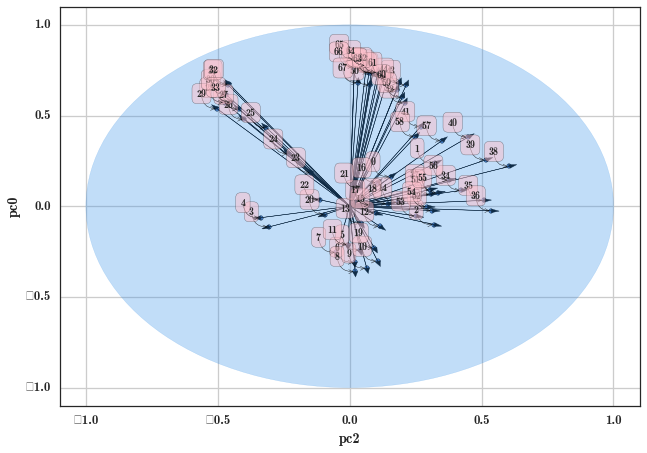

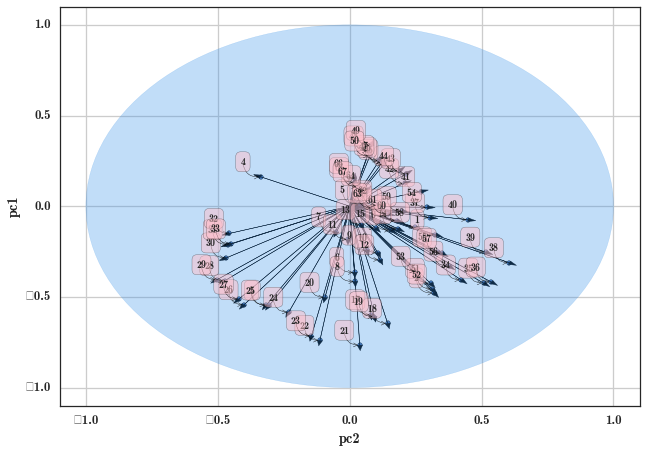

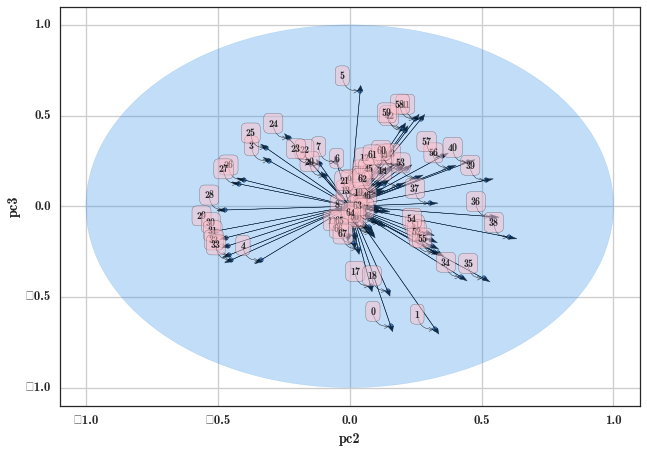

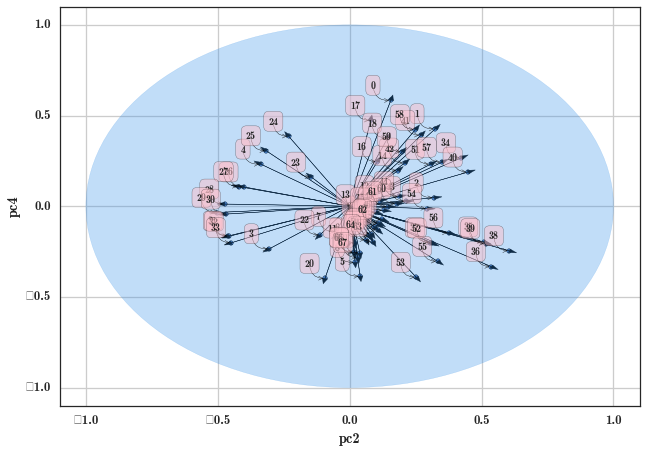

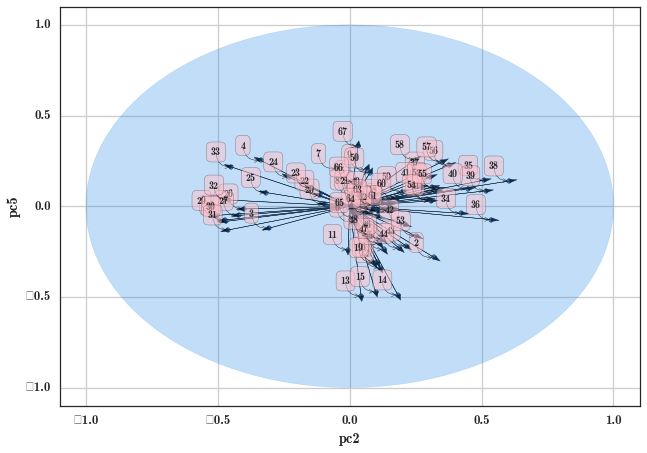

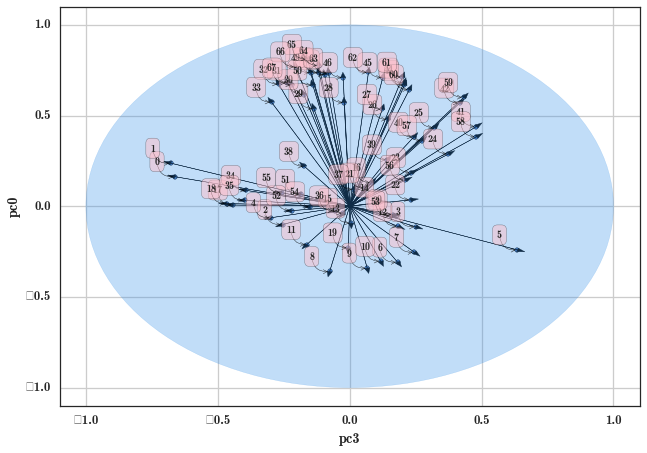

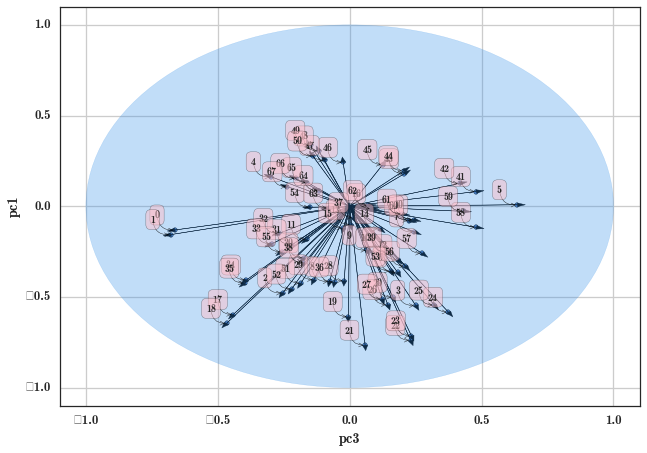

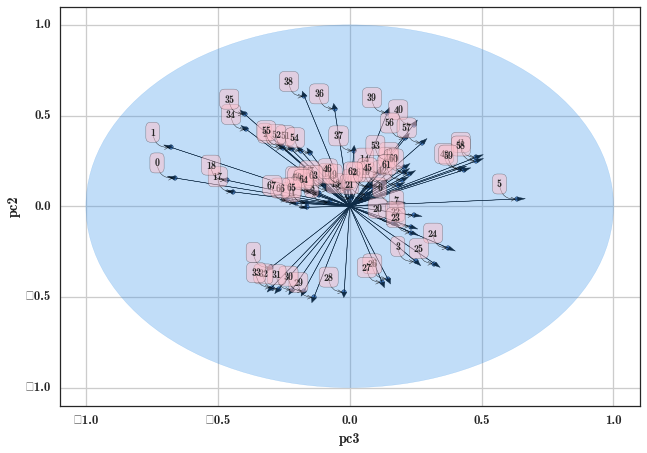

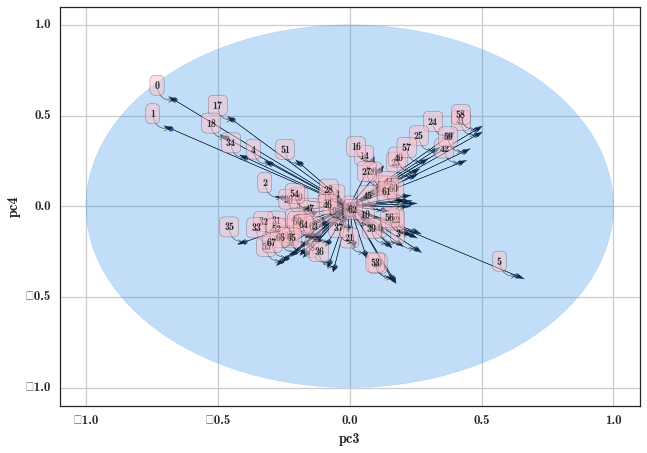

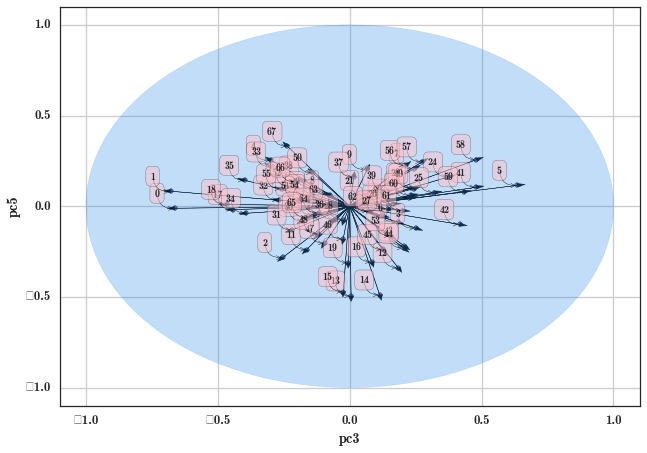

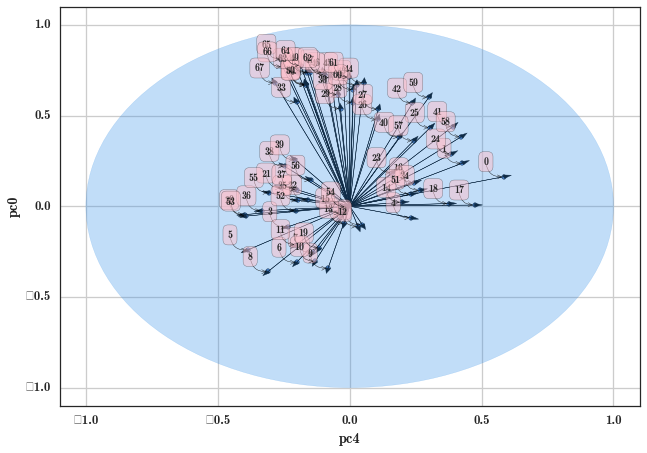

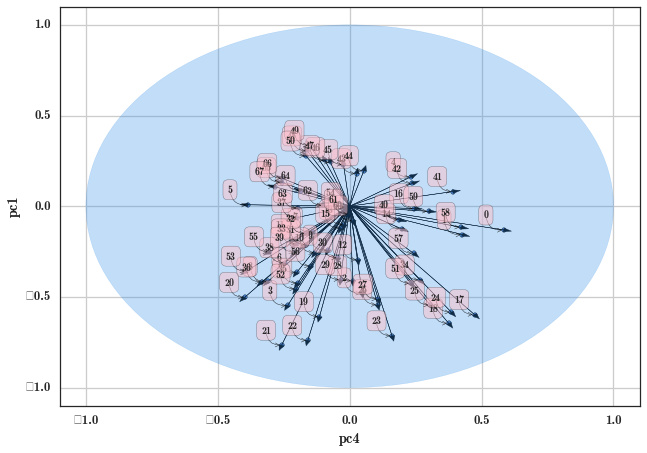

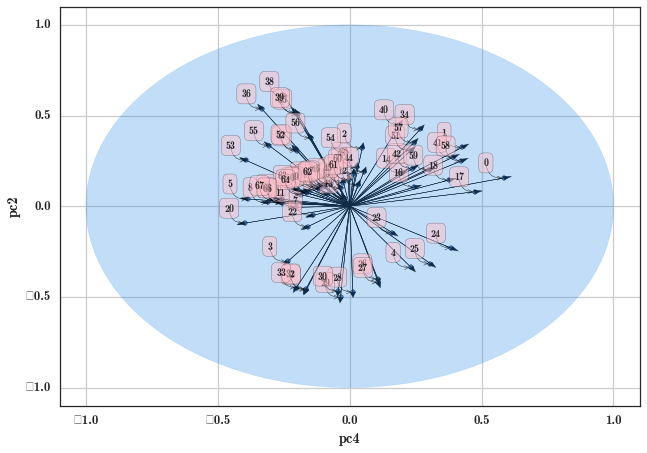

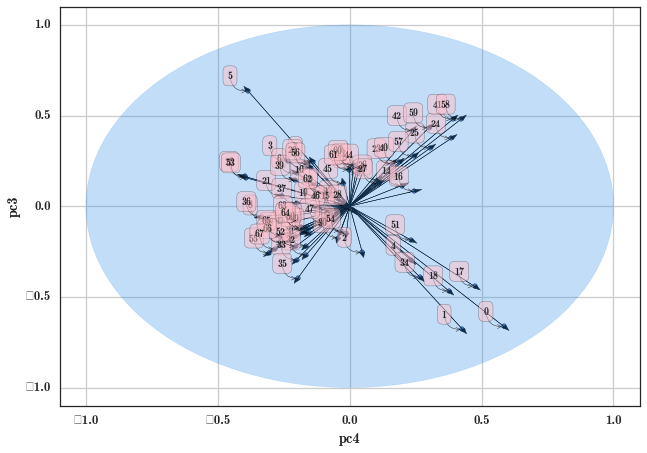

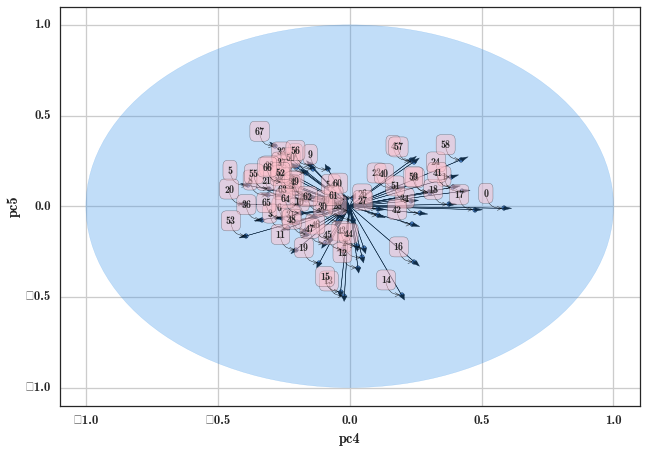

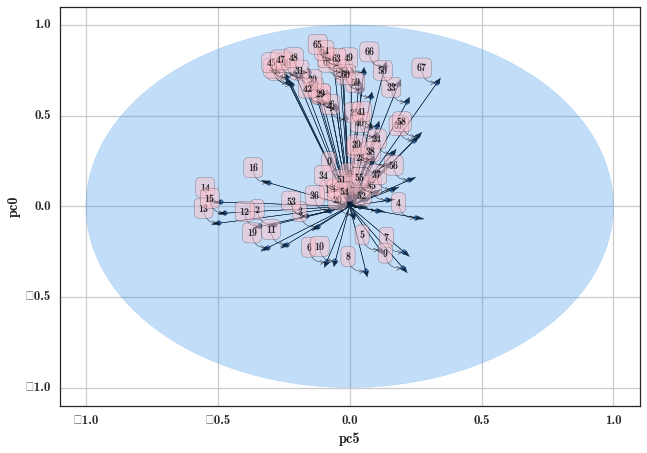

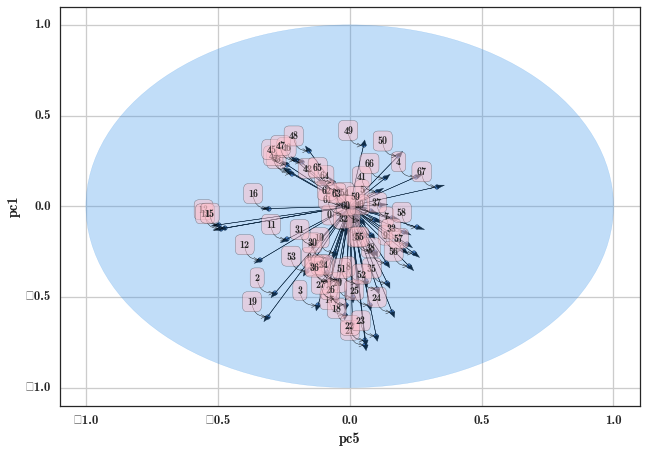

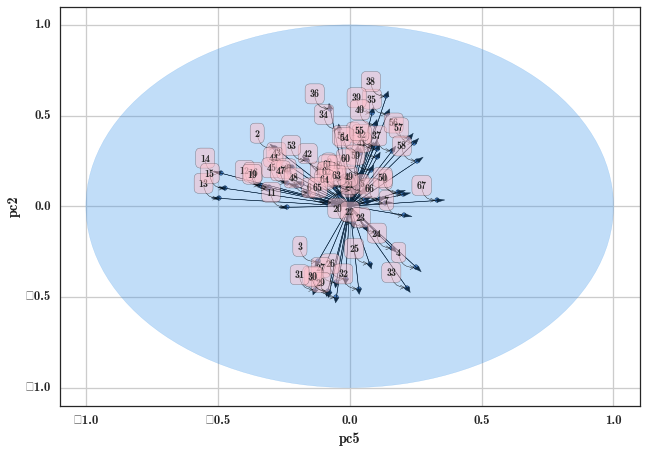

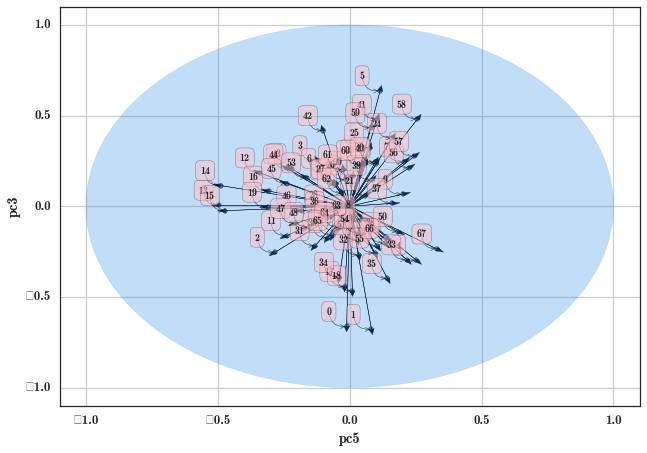

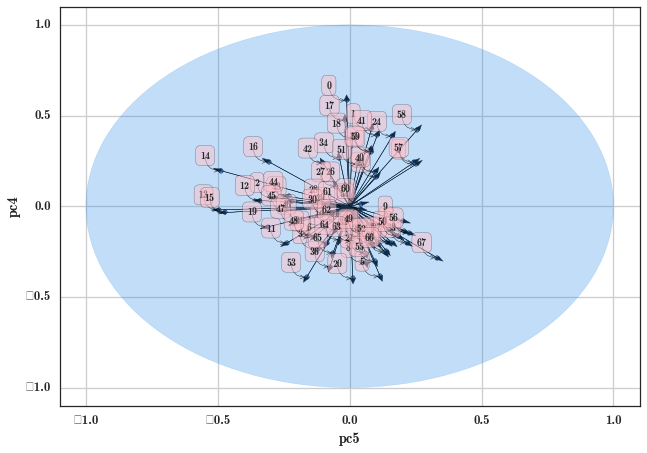

In [53]:
pcs = ['pc0','pc1','pc2','pc3','pc4','pc5']

corrs = [[np.corrcoef(df_pca[pc], Xs[feat])[0][1] * -1 for feat in Xs.columns] for pc in pcs]    
dfs = pd.DataFrame(corrs, columns=Xs.columns)
dfs.index = pcs
print dfs.T
for pcA in pcs:
    for pcB in pcs:
        if pcA != pcB:
            dfs.T.plot(kind='scatter',x=pcA,y=pcB)
            for label, x, y in zip(Xs.columns, dfs.T[pcA], dfs.T[pcB]):
                plt.annotate(
                    label, 
                    xy = (x, y), xytext = (-20, 10),
                    textcoords = 'offset points', ha = 'left', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'pink', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.5'))
                plt.arrow( 0, 0, x, y, fc="k", ec="k")

            circle1=plt.Circle((0,0),1,color='#3490e9', alpha=0.3)
            fig = plt.gcf()
            fig.gca().add_artist(circle1)
            x1,x2,y1,y2 = plt.axis()
            plt.axis((-1.1,1.1,-1.1,1.1));

##LDA

In [66]:
from sklearn.lda import LDA

#let's re-use our 6 first PCs from the PCA output dataset
sns.set(style="white", context="talk")
lda = LDA()
#take first 6 PCAs
Xs = df_pca.iloc[:,:6]
#output labels: unique location mapped to int from 0 to 32
lda.fit(Xs, result['num_addr'])

LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)

In [78]:


print lda.score(Xs, result['num_addr'])


0.247403210576


In [74]:
df_lda = pd.DataFrame(lda.transform(Xs))
df_lda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 6 columns):
0    1059 non-null float64
1    1059 non-null float64
2    1059 non-null float64
3    1059 non-null float64
4    1059 non-null float64
5    1059 non-null float64
dtypes: float64(6)
memory usage: 57.9 KB


In [ ]:
g = sns.PairGrid(df_lda.iloc[:,:5],size=2.5)
g.map_offdiag(plt.scatter)

In [ ]:
print "Meaning of the 5 components:"
for component in pca.components_[:5]:
    print " + ".join("%.3f x %s" % (value,"feature_"+str(name))
                    for value,name in zip(component,Xs.columns))
    print "\n"

##Classification: Random Forests

Let's use the LDA dataset to perform random forest classification 

##Out of sample data

We are going to build our own out of sample dataset using MARSYAS